In [2]:
import SimpleITK as sitk
import dltk
import numpy as np
import os
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology
import cv2
from scipy.ndimage import zoom

In [3]:
INPUT_FOLDER = 'TrainingSet_1_of_2/'
patients = os.listdir(INPUT_FOLDER)

In [4]:
pts = []

In [5]:
for ps in os.listdir(INPUT_FOLDER):
    print("Image Name", ps)
    t1 = sitk.ReadImage(INPUT_FOLDER+ps)
    t2 = sitk.GetArrayFromImage(t1)
    pts.append(t2)

Image Name CTR_TRN_001.nii.gz
Image Name CTR_TRN_002.nii.gz
Image Name CTR_TRN_003.nii.gz
Image Name CTR_TRN_004.nii.gz
Image Name CTR_TRN_005.nii.gz
Image Name CTR_TRN_006.nii.gz
Image Name CTR_TRN_007.nii.gz
Image Name CTR_TRN_008.nii.gz
Image Name CTR_TRN_009.nii.gz
Image Name CTR_TRN_010.nii.gz
Image Name CTR_TRN_011.nii.gz
Image Name CTR_TRN_012.nii.gz
Image Name CTR_TRN_013.nii.gz
Image Name CTR_TRN_014.nii.gz
Image Name CTR_TRN_015.nii.gz
Image Name CTR_TRN_016.nii.gz
Image Name CTR_TRN_017.nii.gz
Image Name CTR_TRN_018.nii.gz
Image Name CTR_TRN_019.nii.gz
Image Name CTR_TRN_020.nii.gz
Image Name CTR_TRN_021.nii.gz
Image Name CTR_TRN_022.nii.gz
Image Name CTR_TRN_023.nii.gz
Image Name CTR_TRN_024.nii.gz
Image Name CTR_TRN_025.nii.gz
Image Name CTR_TRN_026.nii.gz
Image Name CTR_TRN_027.nii.gz
Image Name CTR_TRN_028.nii.gz
Image Name CTR_TRN_029.nii.gz
Image Name CTR_TRN_030.nii.gz
Image Name CTR_TRN_031.nii.gz
Image Name CTR_TRN_032.nii.gz
Image Name CTR_TRN_033.nii.gz
Image Name

In [7]:
len(pts)

218

In [8]:
w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    img = np.transpose(img)
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img

In [9]:
def change_depth(img):
    desired_depth = 64
    current_depth = img.shape[-1]
    depth = current_depth / desired_depth
    depth_factor = 1 / depth
    img_new = zoom(img, (1, 1, depth_factor), mode='nearest')
    return img_new

In [10]:
dep = []

In [11]:
for pt in pts:
    img = rs_img(pt)
    img = change_depth(img)
    print(img.shape)
    dep.append(img)

(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)


C:\Users\Aiman\Anaconda3\envs\sticker\lib\site-packages\scipy\ndimage\interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128, 64)
(128, 128,

# Visualize

In [12]:
def show_images(images, cols = 1, titles = None, save_fig = "default"):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    #fig.set_title("Samples of infected red blood cells")
    
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.savefig('{}'.format(save_fig), dpi=10)
    plt.show()

In [17]:
image_number = 10
img_3d = dep[1]
print(img_3d.shape)

(128, 128, 32)


In [18]:
images = []

# get individual slices from 3d image
for i in range(img_3d.shape[-1]):
    images.append(img_3d[:,:,i])
    
images = np.array(images)
print(len(images))

32


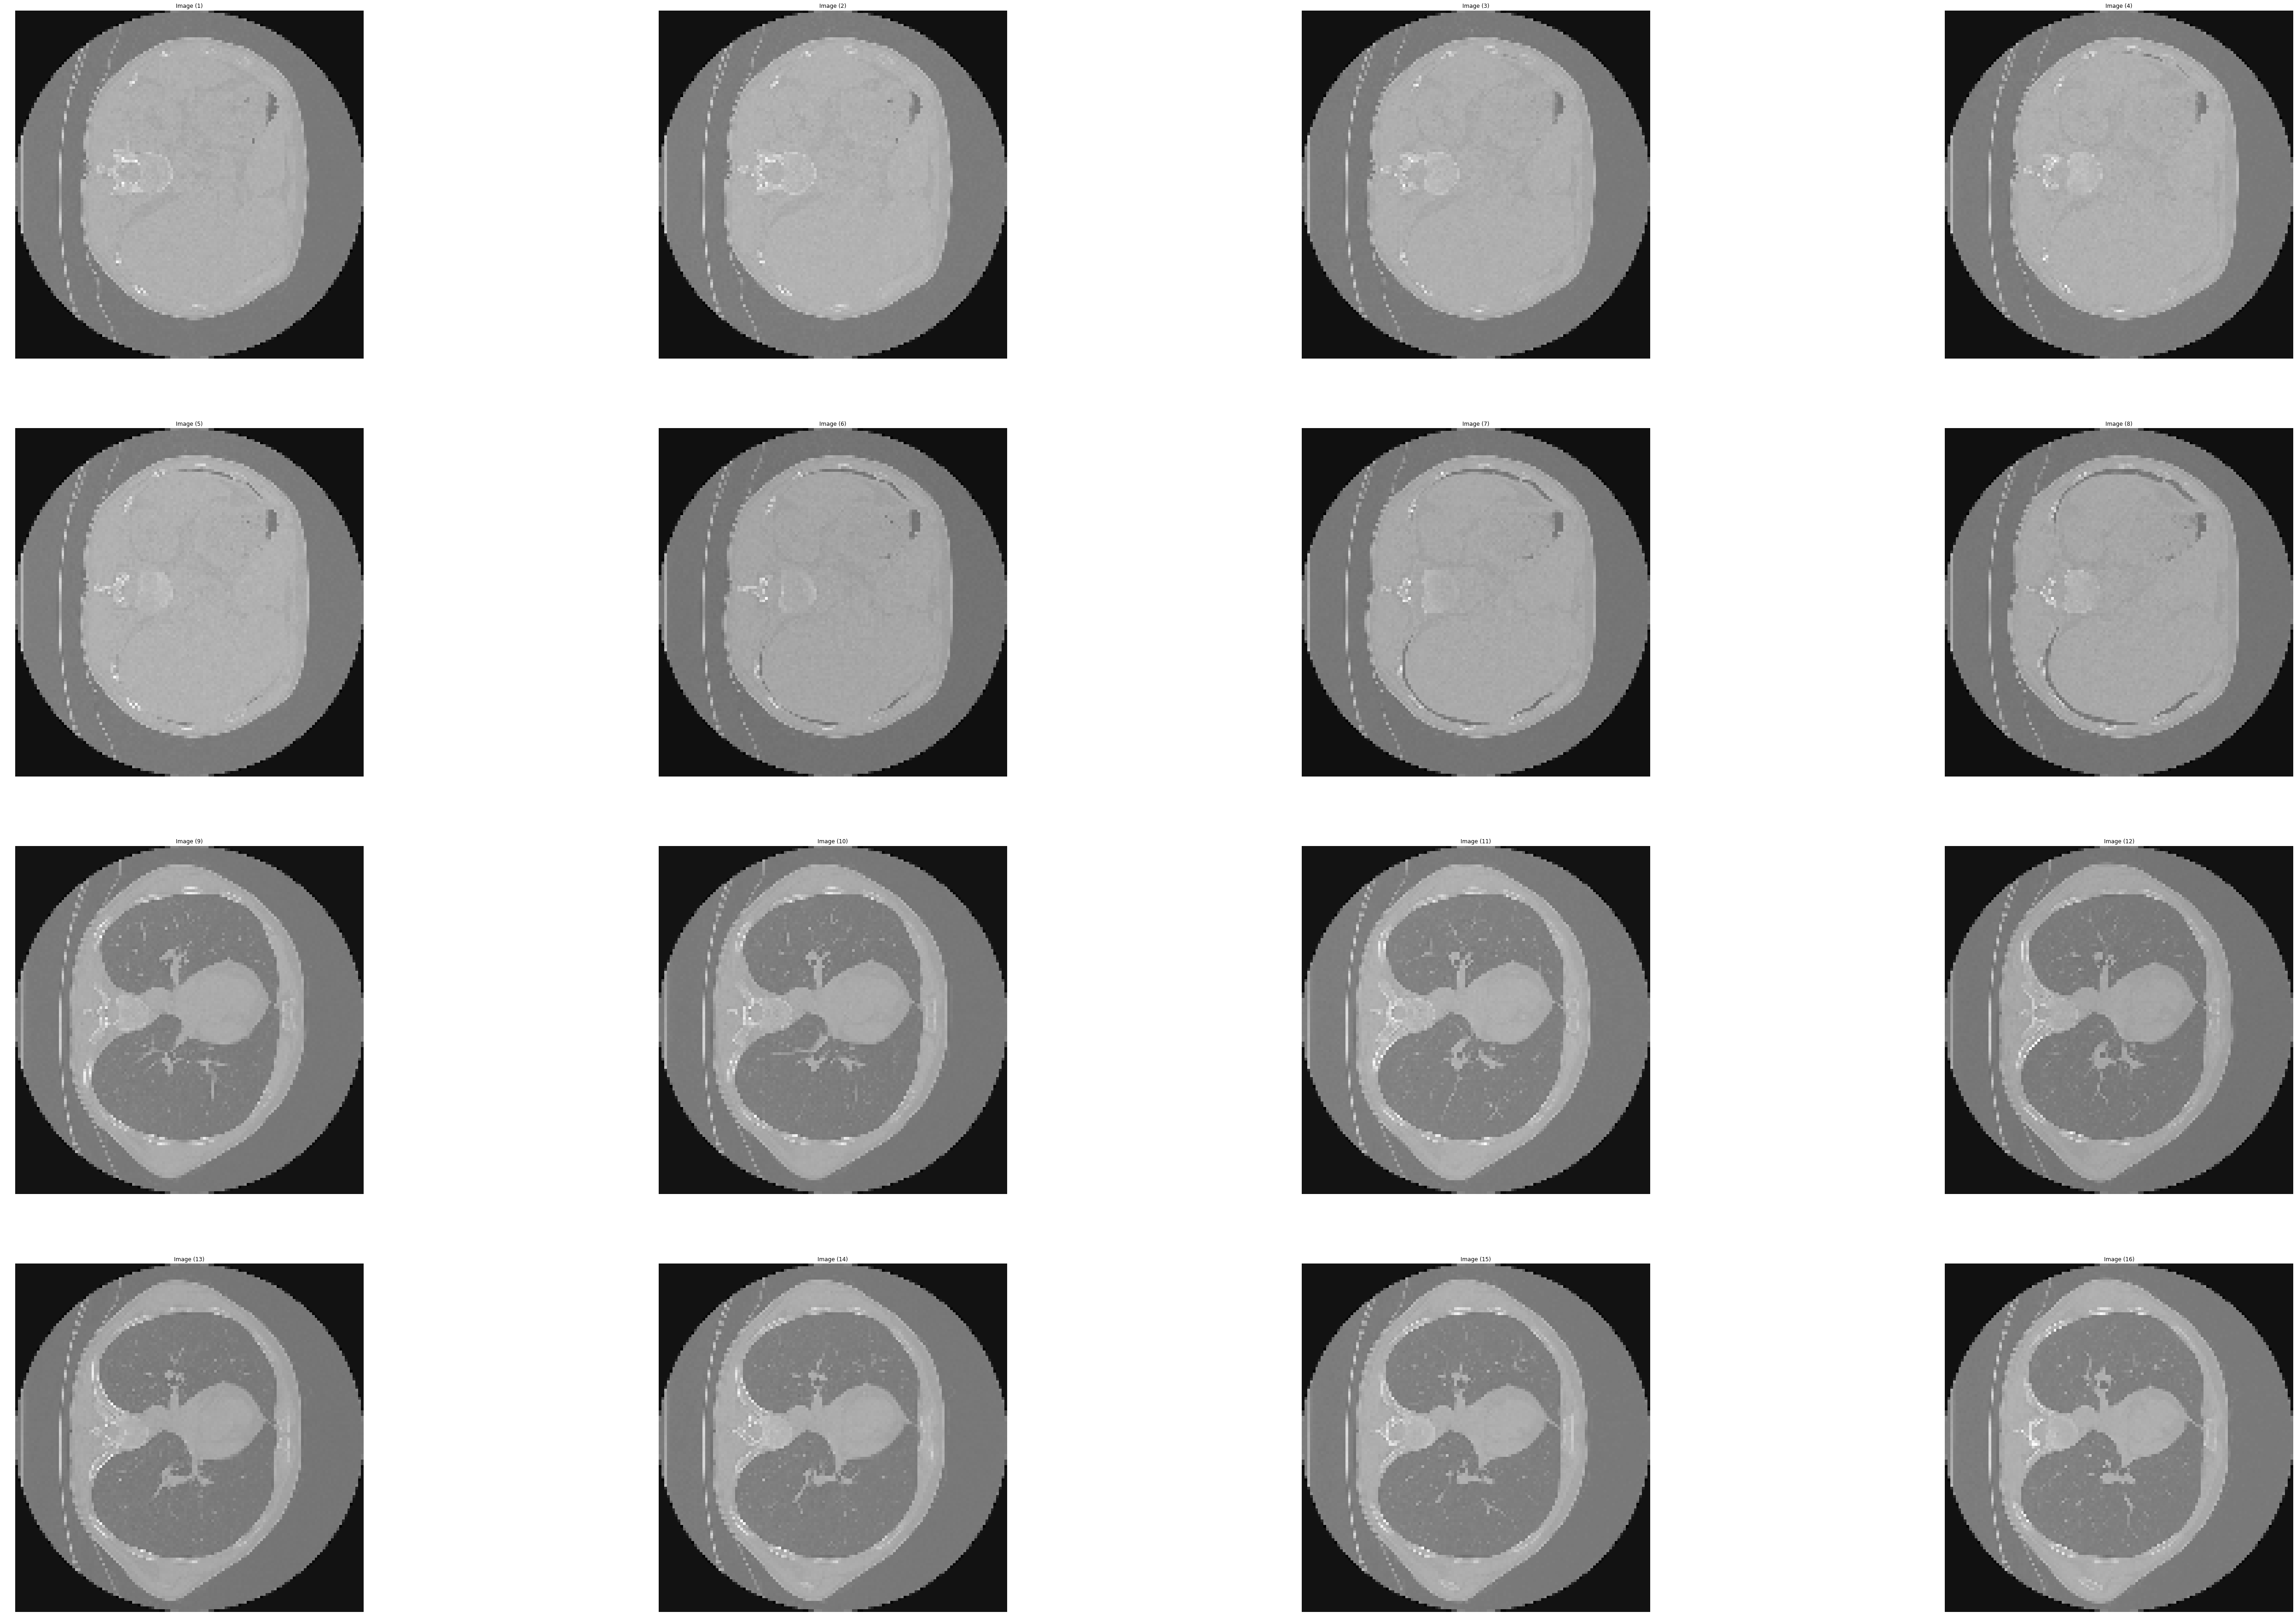

In [19]:
show_images(images[:16], cols = 4, titles = None, save_fig="ct-scans")

In [16]:
dep = np.array(dep)
npy = np.save('dep_64.npy', dep)